# YOUSSEF MOHAMED HELMY

# <u> Machine Learning Internship at UneeQInterns -Task 1  [Customer Churn Prediction]</u>

<i> In this Task my objective is to conduct an in-depth exploration and Prediction of the Customer dataset. We use three distinct classification algorithms—K-Nearest Neighbors (KNN), Naive Bayes, and Logistic Regression—to forecast the Churn outcomes of Customers. my wrok includes a comparative examination of the performance of these algorithms based on various evaluation metrics. </i>

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score,precision_score,f1_score
sns.set_style("darkgrid")

## Loading Data

In [2]:
train=pd.read_csv("customer_churn_dataset-training-master.csv")
test=pd.read_csv("customer_churn_dataset-testing-master.csv")
df=pd.concat([train, test], ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


## Get Statistical information about Data

In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


#  <u>Preprocessing :-</u>

## Checking  Missing  Values

In [6]:
df.isnull().sum()


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

## Handling Missing Values

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

## Checking duplicate Values

In [9]:
df.duplicated().sum()

0

 <i> Nice, There is no duplicate Values </i>

## Separating numerical and categorical columns

In [10]:
numerical_cols = train.select_dtypes(include=['int64','float64']).columns
categorical_cols =  train.select_dtypes(include=['object']).columns

# <u> Visualization :- </u>

## Distributions of Numerical columns

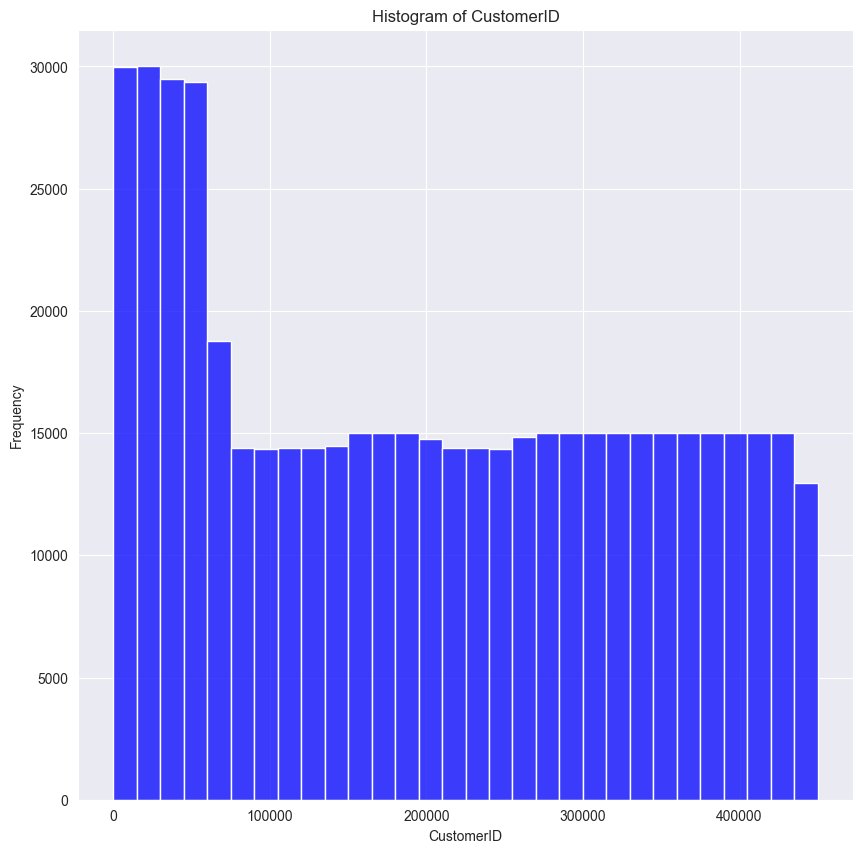

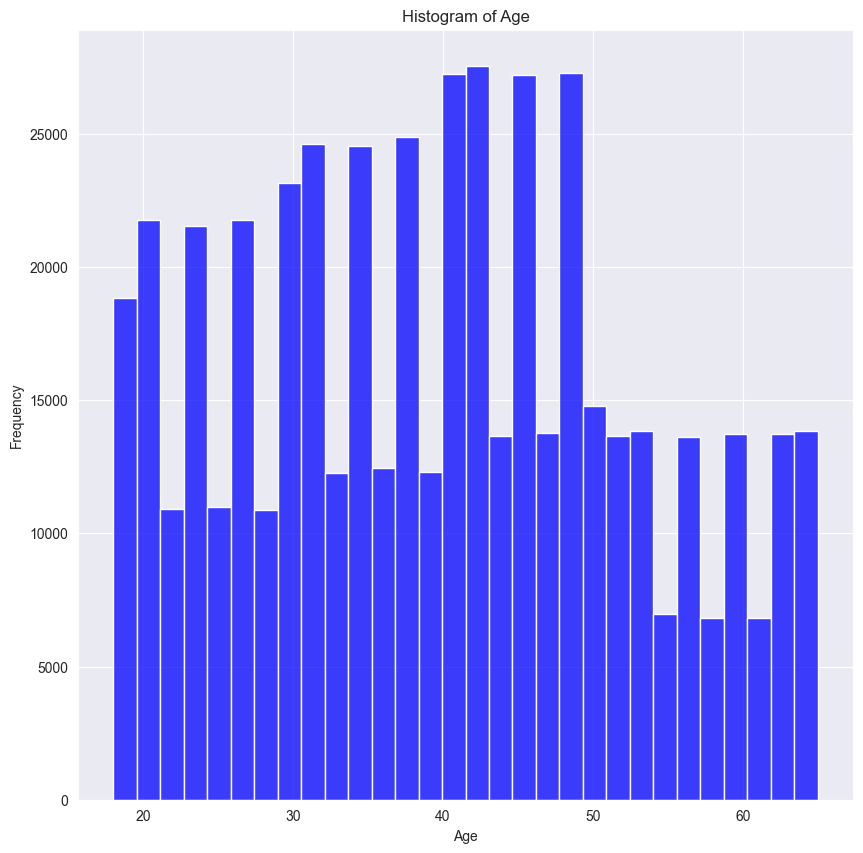

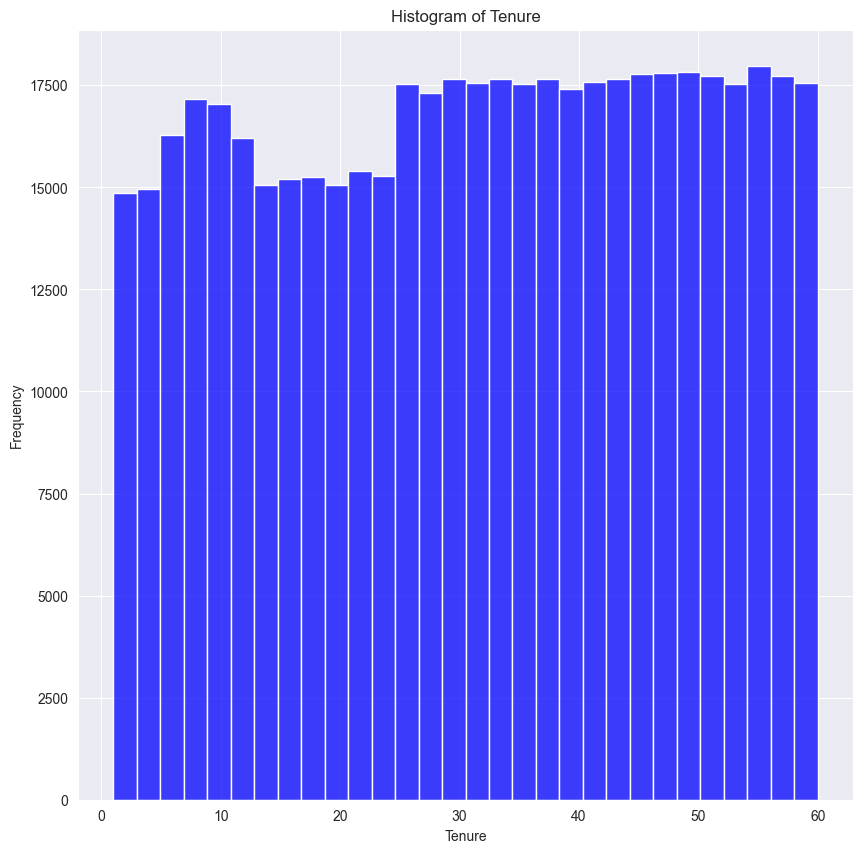

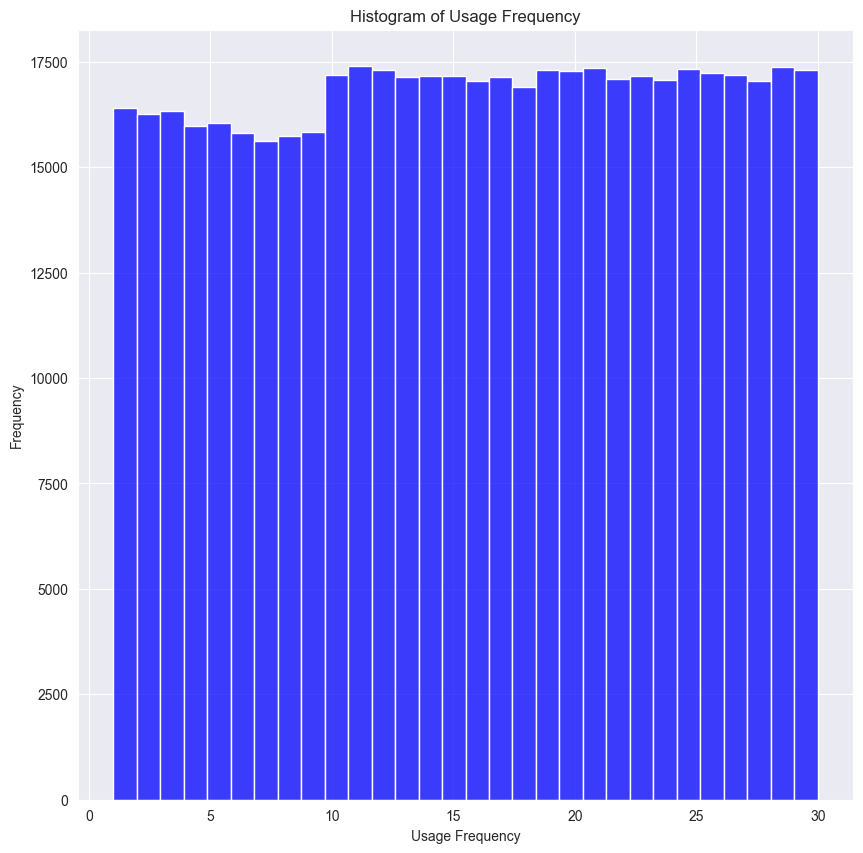

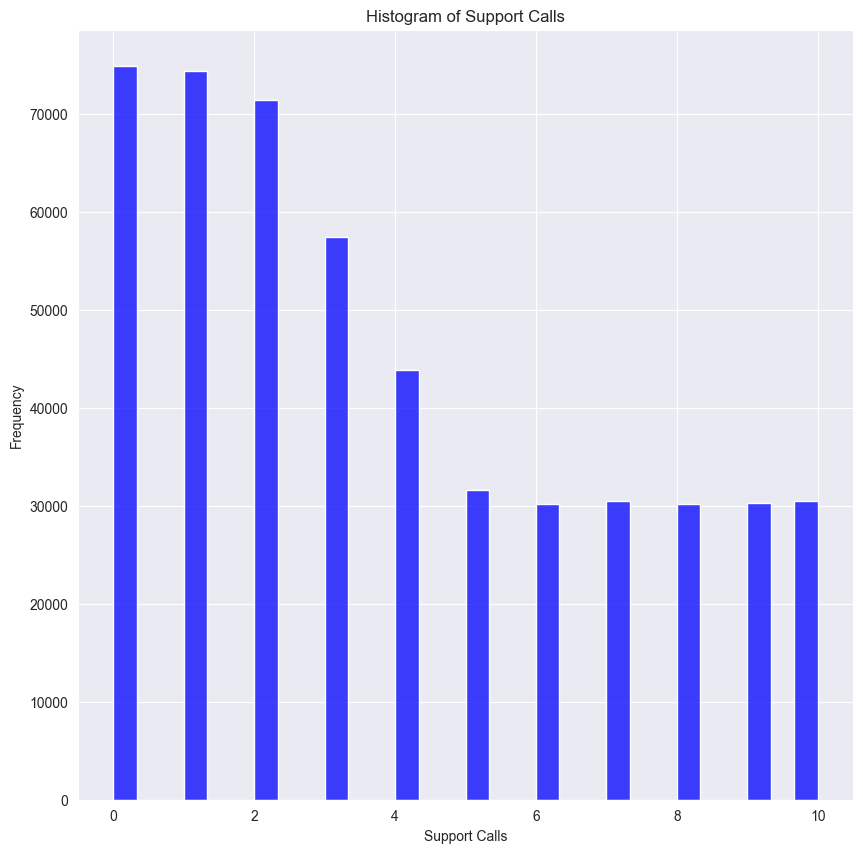

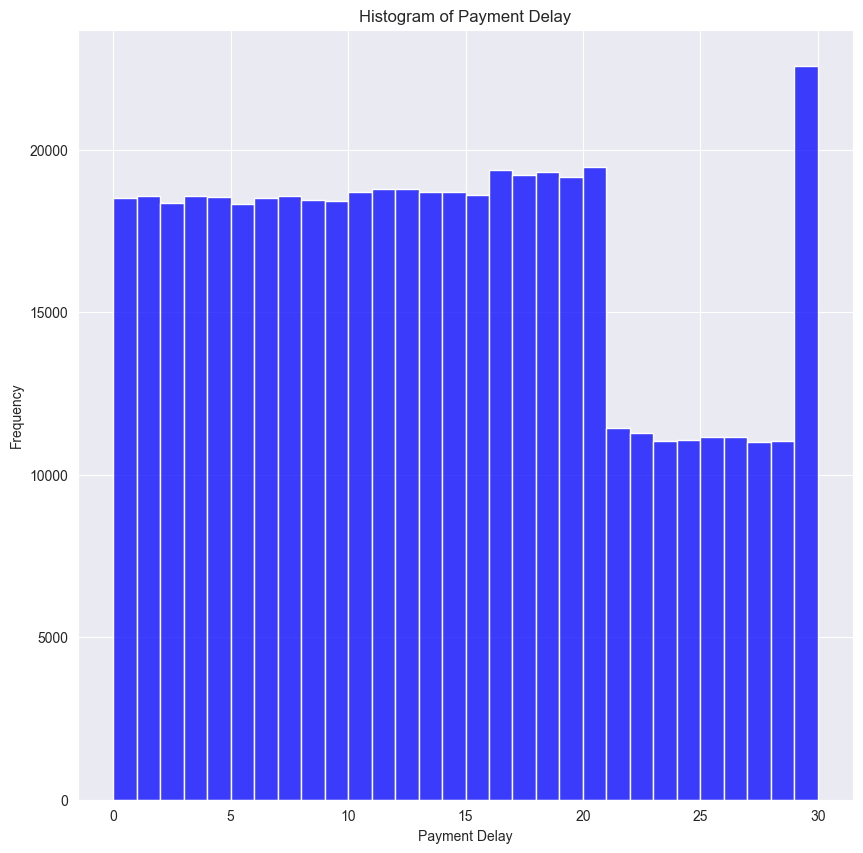

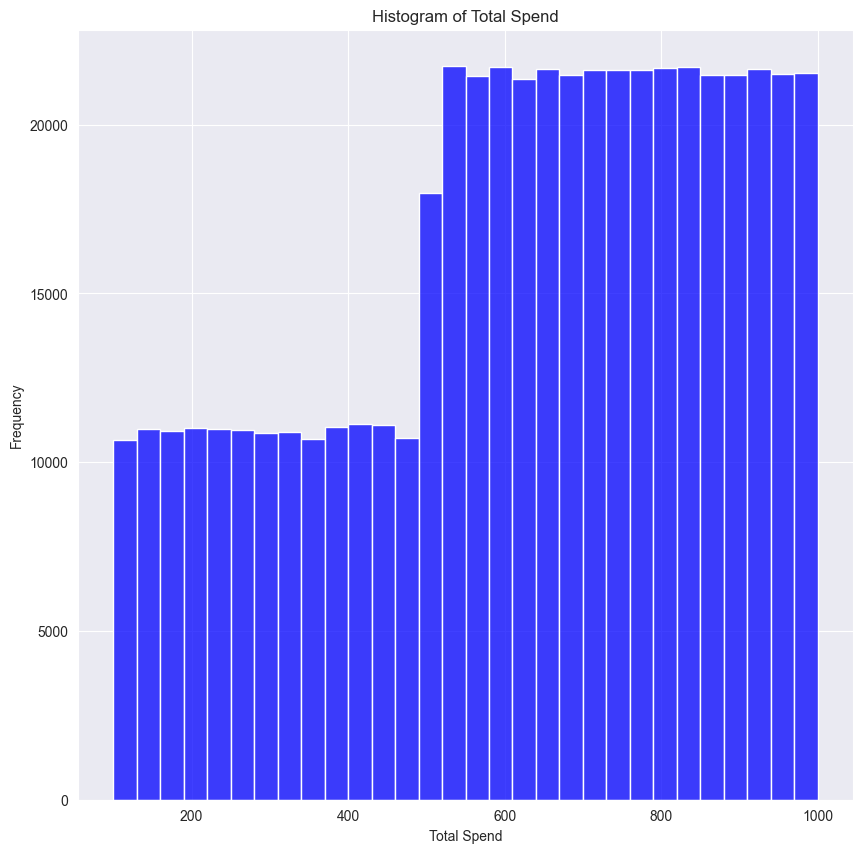

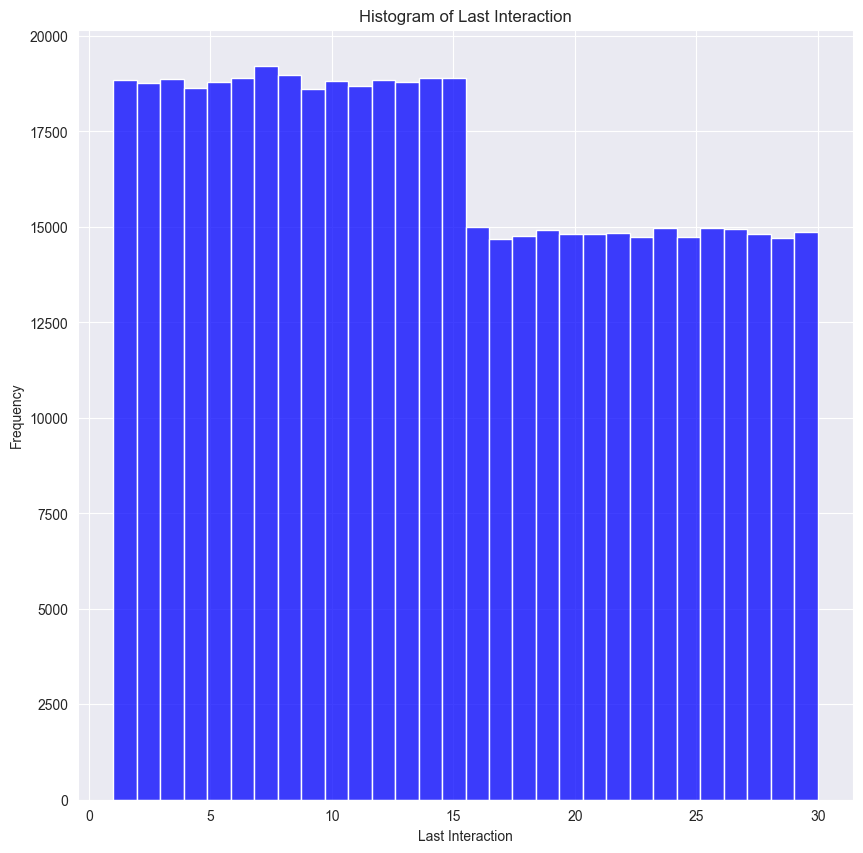

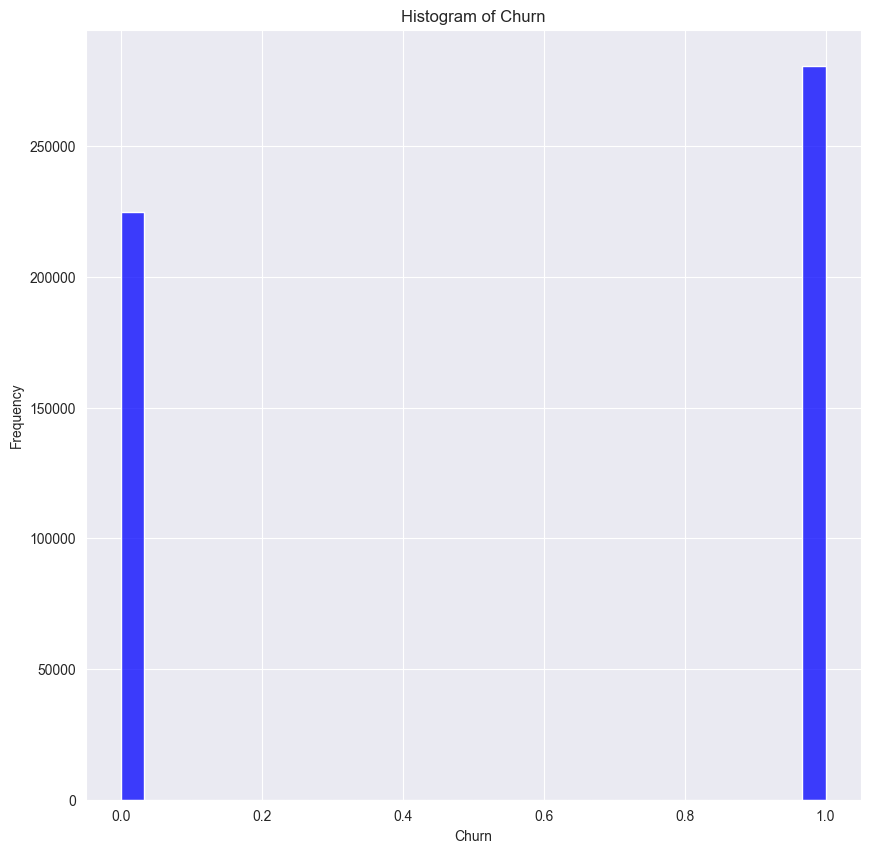

In [11]:
for col in numerical_cols :
  plt.figure(figsize=(10,10))
  sns.histplot(df[col],bins=30,color='blue')
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

# Distribution of categorical columns

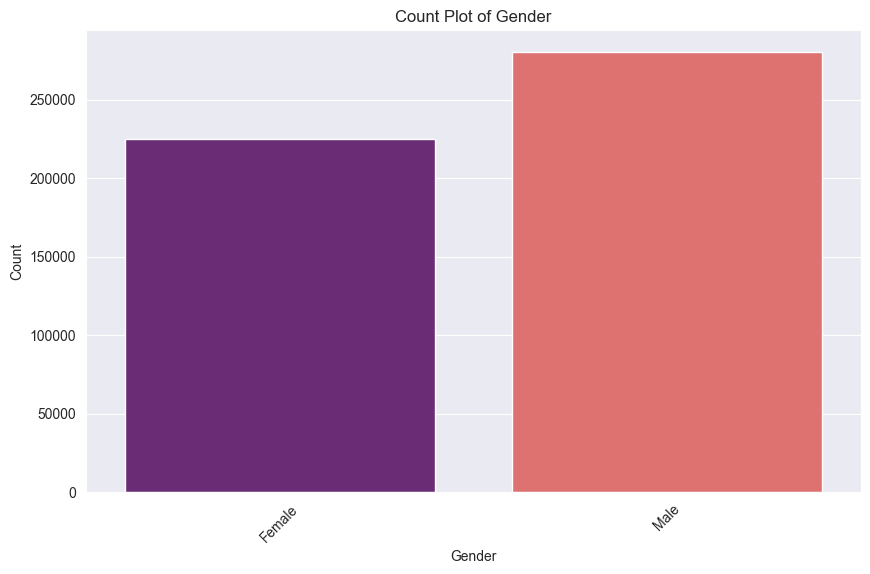

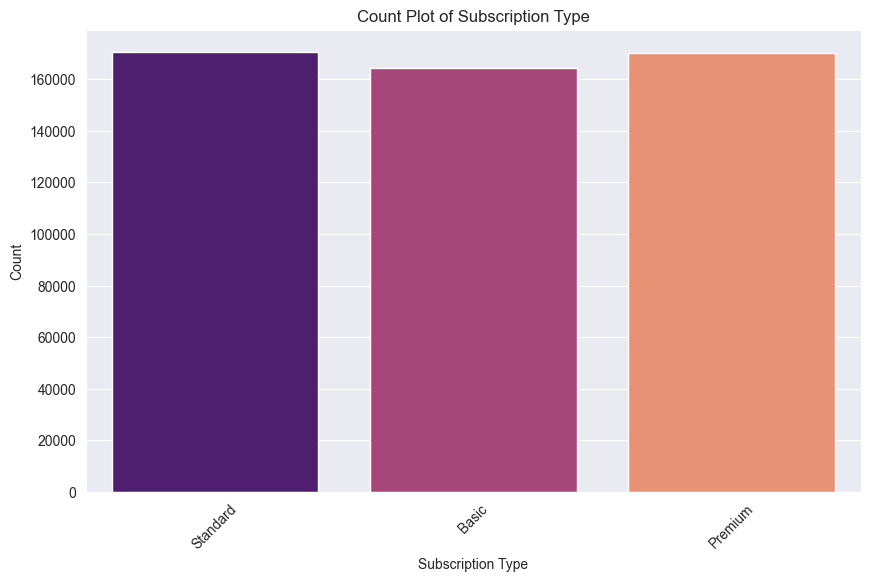

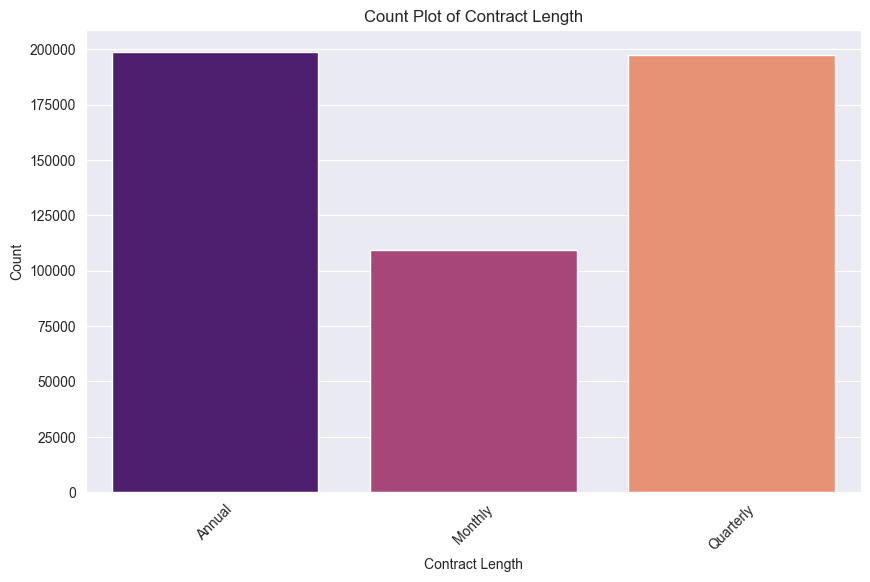

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='magma', hue=col, legend=False) 
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


## Encoding Categorical Columns

In [13]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1}).astype(int)
df['Subscription Type'] = df['Subscription Type'].replace({'Standard': 0, 'Basic': 1, 'Premium': 2}).astype(int)
df['Contract Length'] = df['Contract Length'].replace({'Annual': 0, 'Monthly': 1, 'Quarterly': 2}).astype(int)

C:\Users\engyo\AppData\Local\Temp\ipykernel_12632\574331434.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1}).astype(int)
C:\Users\engyo\AppData\Local\Temp\ipykernel_12632\574331434.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Subscription Type'] = df['Subscription Type'].replace({'Standard': 0, 'Basic': 1, 'Premium': 2}).astype(int)
C:\Users\engyo\AppData\Local\Temp\ipykernel_12632\574331434.py:3: FutureWarning: Downcasting behavior in `replace` is depreca

## Correlation between features

<Axes: title={'center': 'Heatmap showing correlation for all numerical features'}>

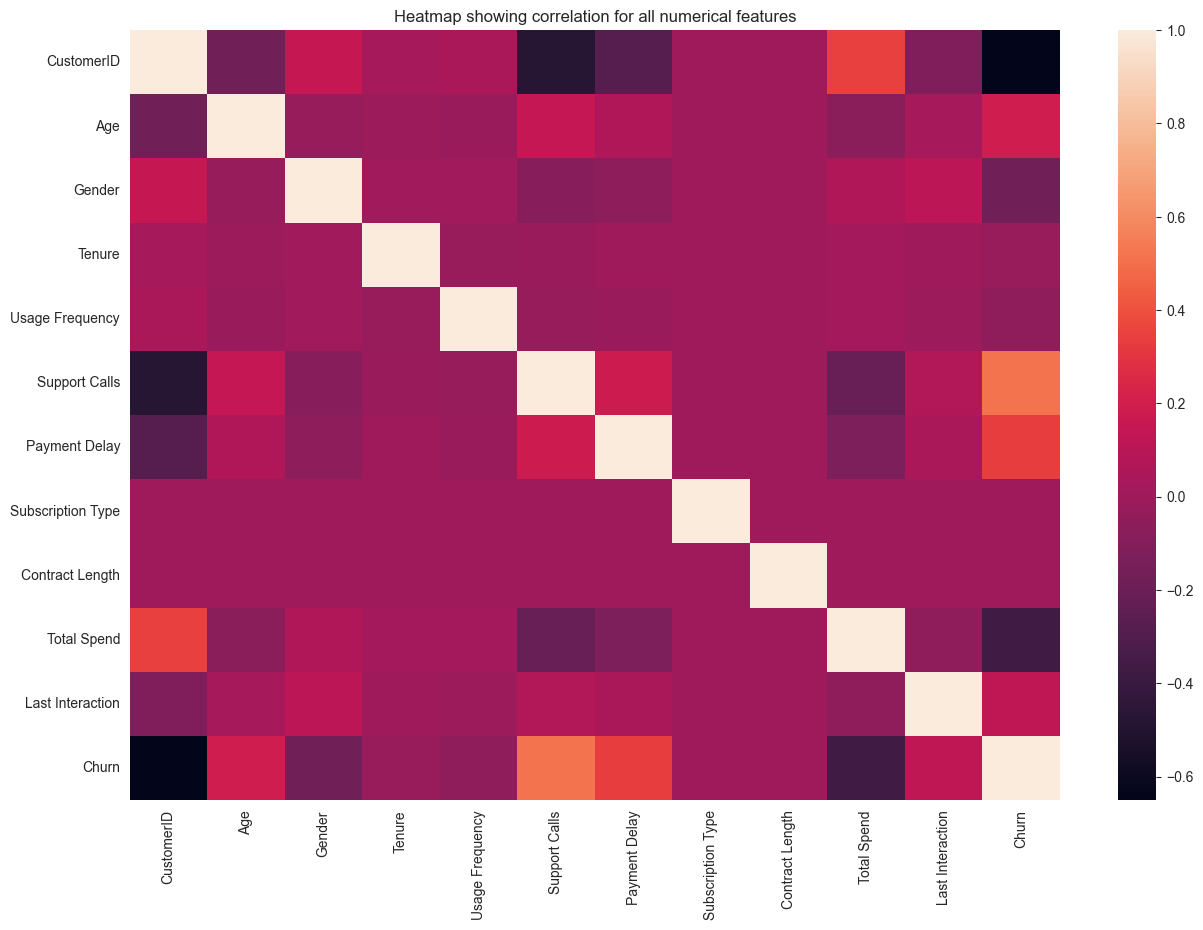

In [14]:
corr_matrix = df.corr()
plt.figure(figsize = (15,10))
plt.title("Heatmap showing correlation for all numerical features")
sns.heatmap(corr_matrix)

# Selecting relevant columns to the target

In [15]:
cdf=df.drop(columns=["CustomerID"])

## Separate Features and Target Column

In [16]:
X = cdf.drop(columns=['Churn']) 
y = cdf['Churn']

# <u> Performing Scaling :- </u>

In [17]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(X)

## Splitting the data into train and test

In [18]:
train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=0.33,random_state=42)

## Applying Classification Algorithms

## Logistic Regression :-

### Initializing Model

In [19]:
model_1=LogisticRegression()

### Train model

In [20]:
model_1.fit(train_x,train_y)
y_pred_LR=model_1.predict(train_x)

### Test Model

In [21]:
y_hat_LR=model_1.predict(test_x)

### Computing Accuracy of Training and Testing Model , Recall , F1_Score and Precision

In [22]:
train_accuracy_LR=accuracy_score(y_pred_LR,train_y)
print("training Accuracy :- ",train_accuracy_LR*100)

print(50*"*")

test_accuracy_LR=accuracy_score(y_hat_LR,test_y)
print("testing Accuracy :- ",test_accuracy_LR*100)

print(50*"*")

# Compute Recall 
Recall_LR=recall_score(y_hat_LR,test_y)
print(f'Recall = {Recall_LR*100}')

print(50*"*")

# Compute F1_Score
F1_Score_LR=f1_score(y_hat_LR,test_y)
print(f'F1_Sore = {F1_Score_LR*100}')

print(50*"*")

# Compute Precision
Precision_LR=precision_score(y_hat_LR,test_y)
print(f'Precision = {Precision_LR*100}')

training Accuracy :-  82.00113445676065
**************************************************
testing Accuracy :-  81.95275855036648
**************************************************
Recall = 84.72898768931006
**************************************************
F1_Sore = 83.57247373823408
**************************************************
Precision = 82.44710647649416


## Naive-Bayes Classifier :-

### Initialize model

In [23]:
GaussianNB_model = GaussianNB()

### Train Model

In [24]:
GaussianNB_model.fit(train_x,train_y)
y_pred_GNB=GaussianNB_model.predict(train_x)

### Test model

In [25]:
y_predict_GNB = GaussianNB_model.predict(test_x)

### Computing Accuracy of Training and Testing Model , Recall , F1_Score and Precision

In [26]:
train_accuracy_GNB=accuracy_score(y_pred_GNB,train_y)
print("training Accuracy :- ",train_accuracy_GNB*100)

print(50*"*")

test_accuracy_GNB=accuracy_score(y_predict_GNB,test_y)
print("testing Accuracy :- ",test_accuracy_GNB*100)

print(50*"*")

# Compute Recall 
Recall_GNB=recall_score(y_predict_GNB,test_y)
print(f'Recall = {Recall_GNB*100}')

print(50*"*")

# Compute F1_Score
F1_Score_GNB=f1_score(y_predict_GNB,test_y)
print(f'F1_Sore = {F1_Score_GNB*100}')

print(50*"*")

# Compute Precision
Precision_GNB=precision_score(y_predict_GNB,test_y)
print(f'Precision = {Precision_GNB*100}')

training Accuracy :-  85.92003261563187
**************************************************
testing Accuracy :-  85.69860482971244
**************************************************
Recall = 89.36736021548329
**************************************************
F1_Sore = 86.7865554601125
**************************************************
Precision = 84.35062696600164


## KNN Algorithm :-

## Selecting the best value for k to apply KNN 

In this part we iterate through different values of k (number of neighbors) and construct K-Nearest Neighbors (KNN) classifiers for each value. And then we train these classifiers on the training data and evaluate their performance on the test data. The accuracy of each classifier is printed out, and the highest accuracy achieved among all values of k is also identified and printed.

In [27]:
n_neighbors = [1,3,5,7,9]
accuracy_n_neighbors = []

for k in n_neighbors:
 knn = KNeighborsClassifier(n_neighbors = k)
 knn.fit(train_x, train_y)
 y_pred = knn.predict(test_x)
 accuracy = accuracy_score(test_y, y_pred)
 print("accuracy when k = ", k, ' : ', accuracy)
 accuracy_n_neighbors.append(accuracy)

Highest_accuracy = max(accuracy_n_neighbors)
print('The Highest accuracy is ', Highest_accuracy*100)

accuracy when k =  1  :  0.8609388308401013
accuracy when k =  3  :  0.8891541405247184
accuracy when k =  5  :  0.8969397425592918
accuracy when k =  7  :  0.8980733933948344
accuracy when k =  9  :  0.8989311292122026
The Highest accuracy is  89.89311292122026


 ### <i> The Best K is equal to 9 </i>

### Initialize Model

In [28]:
KNN_model = KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan')

### Train Model

In [29]:
KNN_model.fit(train_x, train_y)
y_pred_KNN=KNN_model.predict(train_x)

### Test Model 

In [30]:
y_hat_KNN = KNN_model.predict(test_x)

### Computing Accuracy of Training and Testing Model , Recall , F1_Score and Precision

In [31]:
train_accuracy_KNN=accuracy_score(y_pred_KNN,train_y)
print("training Accuracy :- ",train_accuracy_GNB*100)

print(50*"*")

test_accuracy_KNN=accuracy_score(y_hat_KNN ,test_y)
print("testing Accuracy :- ",test_accuracy_KNN*100)

print(50*"*")

# Compute Recall 
Recall_KNN=recall_score(y_hat_KNN,test_y)
print(f'Recall = {Recall_KNN*100}')

print(50*"*")

# Compute F1_Score
F1_Score_KNN=f1_score(y_hat_KNN,test_y)
print(f'F1_Sore = {F1_Score_KNN*100}')

print(50*"*")

# Compute Precision
Precision_KNN=precision_score(y_hat_KNN,test_y)
print(f'Precision = {Precision_KNN*100}')

training Accuracy :-  85.92003261563187
**************************************************
testing Accuracy :-  89.54881896375916
**************************************************
Recall = 89.98260795791975
**************************************************
F1_Sore = 90.68852739359995
**************************************************
Precision = 91.4056103761796


# <u>Comparative Analysis :-</u>

We create a grouped bar plot comparing different evaluation metrics (Testing accuracy, recall, F1-score, and precision) for our three models.
This Approach is useful in case of Imbalanced Data. so Each model's metrics are represented by differently colored bars, with labels indicating the corresponding metrics. The plot provides a visual comparison of the performance of the models across these metrics.

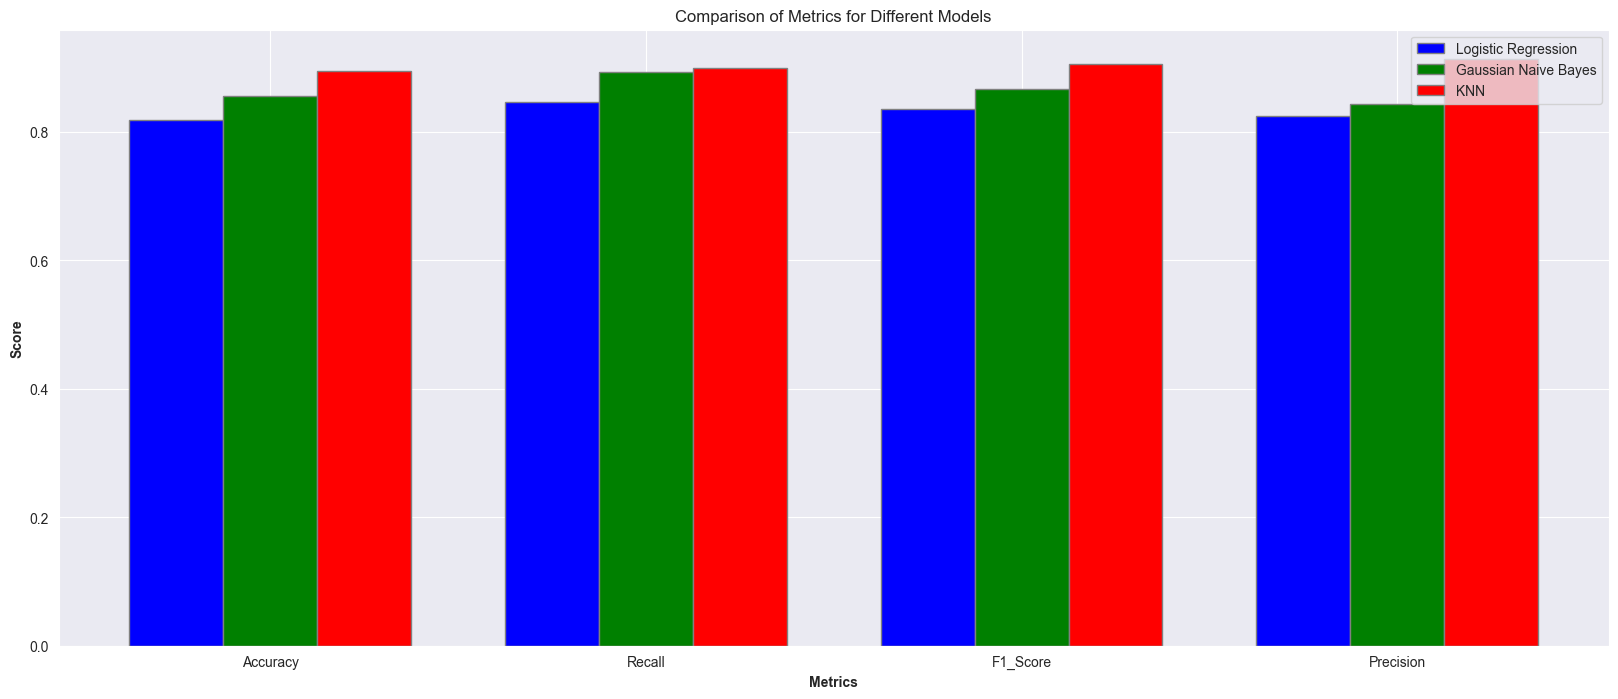

In [41]:
# Metrics for Gaussian Naive Bayes model
metrics_LR = [test_accuracy_LR, Recall_LR, F1_Score_LR, Precision_LR]

# Metrics for K-Nearest Neighbors model
metrics_GNB = [test_accuracy_GNB, Recall_GNB, F1_Score_GNB, Precision_GNB]

# Metrics for SVM model
metrics_KNN= [test_accuracy_KNN, Recall_KNN, F1_Score_KNN, Precision_KNN]

labels = ['Accuracy', 'Recall', 'F1_Score', 'Precision']

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create figure 
plt.figure(figsize=(20, 8))

# Create bars
plt.bar(r1, metrics_LR, color='b', width=bar_width, edgecolor='grey', label='Logistic Regression')
plt.bar(r2, metrics_GNB, color='g', width=bar_width, edgecolor='grey', label='Gaussian Naive Bayes')
plt.bar(r3, metrics_KNN, color='r', width=bar_width, edgecolor='grey', label='KNN')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(labels))], labels)

# Add ylabel
plt.ylabel('Score', fontweight='bold')

# Add title
plt.title('Comparison of Metrics for Different Models')

# Add legend
plt.legend()

# Show plot
plt.show()